# ~ PoC AI Pool 2025 ~
- ## Day 3: Deep Learning
    - ### Module 2: Convolutional Neural Network
-----------

## Minst

Well done, you've arrived here ! You now understand key concepts of neural networks and how they are trained, but you haven't really created one yet...
Don't worry this task will guide you in recreating a neural network trained to detect any handwritten digit on a 28 by 28 pixel image !

Your will start by setup the dataset, your model and at the end, play with it ! 

In [5]:
#Just import the necessary libraries

import time
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


#For the model don't forget
import torch.nn as nn
import torch.optim as optim

### Part - 1 Prepare the data 

before actually create a neural network we need to preparate our data that we will fit to your model,

remember ***THE MOST important in machine learning is the quality of the data*** and not really the model....

your goal here is to specify how we want the data, this can be process by initialise a data and transform it in a [tensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html) and normalize it if you want. you can check the doc of transform [here](https://pytorch.org/vision/0.9/transforms.html).

In [10]:
#TODO: define the transforms compose
transform = transforms.ToTensor()

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
eval_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"Len train dataset : {len(train_set)}")
print(f"Len test  dataset : {len(eval_set)}")

Len train dataset : 60000
Len test  dataset : 10000


You will say why whe created two dataset ? 

It's because one will be for the training of the model and the other for evaluate this one by passing data he never seen, to see if the model didn't overfit the data.

To understand what's inside this code you can try below to visualise some of the examples !

***Don't hesitate to change the NUMBER_OF_ELEMENTS enum to see mutliples examples or no***

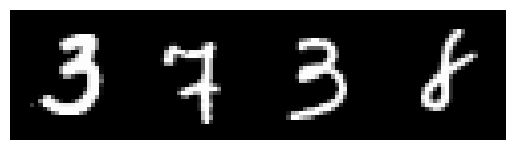

Labels : 3; 7; 3; 8;


In [23]:
# Visualisation of some element of the dataset you can change the number if you want
NUMBER_OF_ELEMENTS = 4

def imshow(img):
    # img = img * 0.5 + 0.5  # Denormalisation if you have normalised the data
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

train_loader_vis = torch.utils.data.DataLoader(train_set, batch_size=NUMBER_OF_ELEMENTS, shuffle=True)

# Random image
dataiter = iter(train_loader_vis)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels :', ' '.join(f'{labels[j].item()};' for j in range(NUMBER_OF_ELEMENTS)))

We can also look at different attributes like the number of images in the dataset, the size of each image or the label of an image.

In [24]:
image, label = train_set[0]

print("image :", image) # pixels value if you want to see the matrix
print("-"*60)
print("image shape :", image.shape) # pixels value
print("label :", label) # Number represented in the image


image : tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

As you can see, we have images **28 pixels high and 28 pixels wide**, with **one channel** (grayscale !).

These images represent a number from 0 to 9, we have **10 different labels** (or 10 different possible output).\
The first picture represents a 5, therefore its label is 5.

---
## Batch-Size

Did you remember when we talk about batch and parallelization of multiple example with torch ? This is very important here !

**60,000** is a lot of images to process one by one, to make it easier for our model to process this data while training we are going to use ``batch_size``.

for one who forget , ``batch_size`` is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. In other words, before calculating the error and apply backpropagation after each image, if our batch size is 64 we will go through 64 images before doing it. **This improves the learning of our AI** by **applying the backpropagation on the error average.**

As in the previous notebook we will use a [**``dataloader``**](https://pytorch.org/docs/stable/data.html), this time we don't need to redefine a ``Dataset`` class since we are using a ``builtin`` dataset in ``torchvision``.

Remember to specify that you use the ``train_set`` and you want a ``batch_size`` of ``64`` and also ``shuffle`` it.

In [32]:
#TODO : Define the batch size
BATCH_SIZE = 64

train_loader = torch.utils.data.DataLoader(train_set, BATCH_SIZE, True)

assert len(train_loader) == 938, "Your train loader is not well implemented, remember that the batch size is 64"

batch = next(iter(train_loader)) # obtain the first batch
images, labels = batch
print("image shape :", images.shape)
print("labels shape :", labels.shape)

image shape : torch.Size([64, 1, 28, 28])
labels shape : torch.Size([64])


We now have `938` lots containing `64` images each (and their equivalent labels).\
This will **drastically decrease our training time** because with one backward propagation, 64 images are processed.


> Pytorch is built to be used with batch, it is thus quite simple to implement it in our code. 

*you can try after to change your batch and see the difference in the learning (remove the assert for test it)* !

In [37]:
#TODO: Also load the test set with the same batch_size...

eval_loader = torch.utils.data.DataLoader(eval_set, BATCH_SIZE, True)

assert len(eval_loader) == 157, "Your eval loader is not well implemented"

## The Model!

And your moment has arrived!

I’m sure you’ve been eagerly anticipating this step, and now you’re ready to build your very first real neural network, complete with a more complex architecture.

A quick tip for working with PyTorch: today’s task is a classification problem, as we’ve defined specific output labels. For this, we’ll be using the **[cross-entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)** loss function. (Remember, yesterday you used the **[binary cross-entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)** loss with logistic regression, since the output was restricted to just 0 or 1.)

*Don't hesistate to jump at the end of the torch introduction as helping you for initialize the model and train it !*

IF you encounter difficulties to create your model, at the end of this notebook there is a pseudo code of the architecture as to help you to create the model, but try to do it alone ! (with everything you see before)

In [ ]:
#TODO : Define the learning rate
LEARNING_RATE = 0.01


class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1, 1)
        #TODO : add other layers if you want
        self.c1_2d = nn.Conv2d(1, 1, 3)

        self.loss = nn.CrossEntropyLoss() # Loss function cross entropy
        self.optimizer = optim.Adam(self.parameters(), lr=LEARNING_RATE) # Optimizer Adam
        #TODO : add other optimizers if you want
        self.relu = nn.ReLU() # Activation function
        self.softmax= nn.Softmax(dim = 1)

        # Device choice
        if torch.cuda.is_available():
            self.device = torch.device('cuda')
        elif torch.backends.mps.is_available():
            self.device = torch.device('mps')
        else:
            self.device = torch.device('cpu')
        print(f"Device : {self.device}")
        self.to(self.device)

    def forward(self, x):
        #TODO : Define the forward pass
        x = self.c1_2d(x)
        self.flatten(x)
        return self.fc1(x)


    def train_model(self, epochs, train_loader):
        self.train()  # Training mode

        for epoch in range(epochs):
            start_time = time.time()  # Start time of the epoch
            running_loss = 0.0
            total_batches = 0

            for i, data in enumerate(train_loader): # Enumerate the data, all the dataset
                inputs, labels = data
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                #TODO Compute the training part ~ 5 lines
                ...
                ###################################

                # Gradient to zero
                ...

                # Forward pass
                outputs = self.forward(data)

                # Loss calculation
                loss = self.loss(inputs, outputs)

                # Backward pass
                ...

                # Optimisation step
                ...

                running_loss += loss.item()
                total_batches += 1 # just help for print 

                # print every 8 mini-batches
                if (i + 1) % 8 == 0 or (i + 1) == len(train_loader):
                    print(f"\rEpochs {epoch + 1}/{epochs} | Lot {i + 1}/{len(train_loader)} | Loss : {loss.item():.4f}", end='')

            
            avg_loss = running_loss / len(train_loader)
            epoch_time = time.time() - start_time

            print("\n")
            print("-" * 60)
            print(f"Epochs {epoch + 1}/{epochs} finish | Average Loss : {avg_loss:.4f} | Time : {epoch_time:.2f} seconds")
            print("-" * 60)

        # change the model_path if you want
        model_path = "mnist_model.pth"
        print('Training finished, saving model to :', model_path)
        torch.save(self.state_dict(), model_path)


    def eval_model(self, test_loader):
        self.eval()  # Evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on {total} images is : {100 * correct / total:.2f}%')

    def load_weights(self, model_path):
        self.load_state_dict(torch.load(model_path, weights_only=True, map_location=self.device))
        self.eval()

Well done ! you need now to initialise your model by simple call your python class, 

It permits that if you want to restart the training with random weights, you can restart this cell. Otherwise, the training if (you restart it) will continue from the **`last loss value`** and the **`last weight`**.

In [47]:
my_model = MNISTModel()

Device : cpu


In [48]:
#TODO: define number of epochs
EPOCHS = 10000

my_model.train_model(EPOCHS, train_loader)

TypeError: relu(): argument 'input' (position 1) must be Tensor, not list

you can now test your model by simply call the eval function !

In [ ]:
my_model.eval_model(eval_loader)

If you’d like to retrain and check for better results, simply re-run the training cell or initialize a new model to start fresh!

### Play with your model !

Now it's time to test your own model! **Please paste your model architecture** (*`__init__`* and *`forward`* methods) into the file [model.py](model.py), and run the following command in the terminal:

```bash
python app.py
```
after this break, you have two option : 

- ***2.2 - Cifar*** -> try to implemente an really complex architecture called VAE-GAN for another task 

- ***3.1 - My torch*** -> try to recreate some function of torch, to really understand how this is work (it my be help you for creating a VAE-GAN architecture :))

choose one ! *(you can do both also if you finish in advance)*

---
---

In [ ]:
#TODO : Define the learning rate
LEARNING_RATE = ...


class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = ... # Flatten the data
        self.fc1 = ... # Fully connected layer from 28**28 to 128
        self.fc2 = ... # Fully connected layer from 128 to 64
        self.fc3 = ... # Fully connected layer from 64 to 10

        self.loss = ... # Loss function cross entropy
        self.optimizer = optim.Adam(self.parameters(), lr=LEARNING_RATE) # Optimizer Adam
        self.relu = ... # Activation function
        
        # Device choice 
        if torch.cuda.is_available():
            self.device = torch.device('cuda')
        elif torch.backends.mps.is_available():
            self.device = torch.device('mps')
        else:
            self.device = torch.device('cpu')
        print(f"Device : {self.device}")
        self.to(self.device)

    def forward(self, x):

        x = ... # Flatten the data

        ... # Compute your self.fc1
        ... # Activation function

        ... # Compute your self.fc2
        ... # Activation function
        ... # Compute your self.fc3

        return ...


    def train_model(self, epochs, train_loader):
        self.train()  # Training mode

        for epoch in range(epochs):
            start_time = time.time()  # Start time of the epoch
            running_loss = 0.0
            total_batches = 0

            for i, data in enumerate(train_loader): # Enumerate the data, all the dataset
                inputs, labels = data
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                # Gradient to zero
                ...

                # Forward pass
                outputs = ...

                # Loss calculation
                loss = ...

                # Backward pass
                ...

                # Optimisation step
                ...

                running_loss += loss.item()
                total_batches += 1 # just help for print 

                # print every 8 mini-batches
                if (i + 1) % 8 == 0 or (i + 1) == len(train_loader):
                    print(f"\rEpochs {epoch + 1}/{epochs} | Lot {i + 1}/{len(train_loader)} | Loss : {loss.item():.4f}", end='')

            
            avg_loss = running_loss / len(train_loader)
            epoch_time = time.time() - start_time

            print("\n")
            print("-" * 60)
            print(f"Epochs {epoch + 1}/{epochs} finish | Average Loss : {avg_loss:.4f} | Time : {epoch_time:.2f} seconds")
            print("-" * 60)

        # change the model_path if you want
        model_path = "mnist_model.pth"
        print('Training finished, saving model to :', model_path)
        torch.save(self.state_dict(), model_path)


    def eval_model(self, test_loader):
        self.eval()  # Evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on {total} images is : {100 * correct / total:.2f}%')

    def load_weights(self, model_path):
        self.load_state_dict(torch.load(model_path, weights_only=True, map_location=self.device))
        self.eval()
    
